In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Load training and test data
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

## Data clean up

In [3]:
# Findout missing value in train data
missing_values = train_data.isnull().sum()
print(missing_values[missing_values>0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [4]:
# Here some numerical fetures with NUll data. Update Null with mean value
numerical_featurs = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
train_data[numerical_featurs] = train_data[numerical_featurs].fillna(train_data[numerical_featurs].mean())

# For categorical_features

enum_features = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                         'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
                         'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

train_data[enum_features] = train_data[enum_features].fillna(train_data[enum_features].mode().iloc[0])

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [6]:
imp_x_features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']
y_feature = ['SalePrice']
x_train_data = train_data[imp_x_features]
y_train_data = train_data[y_feature]
finnal_train_data = train_data[imp_x_features+y_feature]


## Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

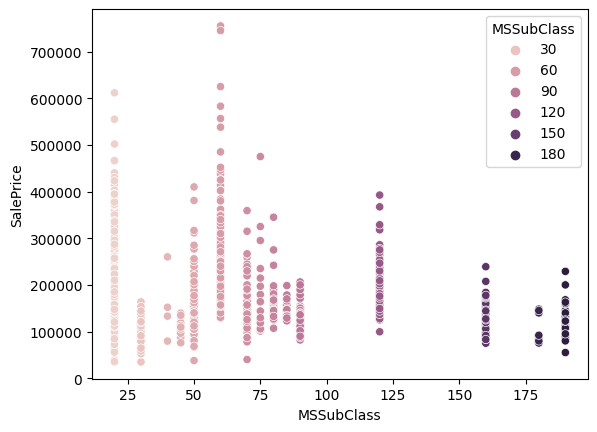

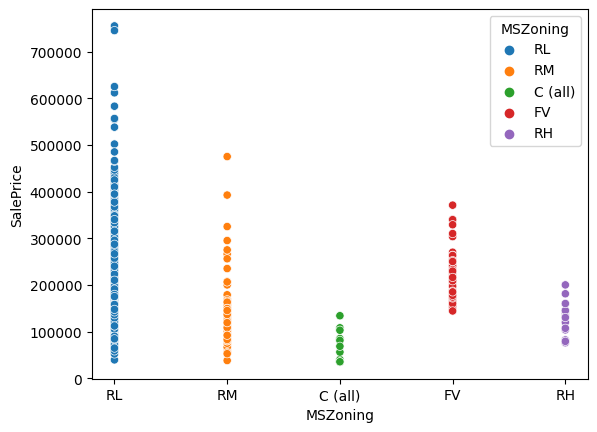

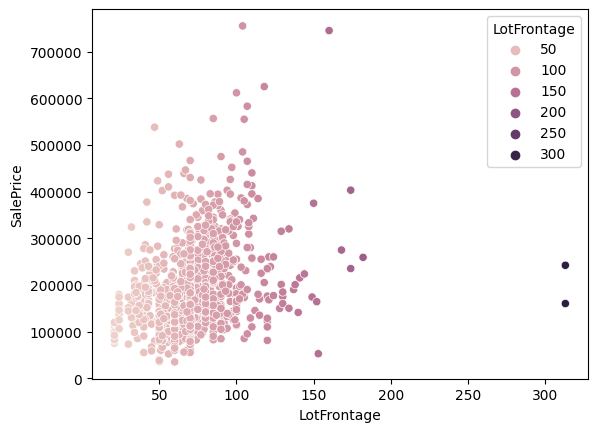

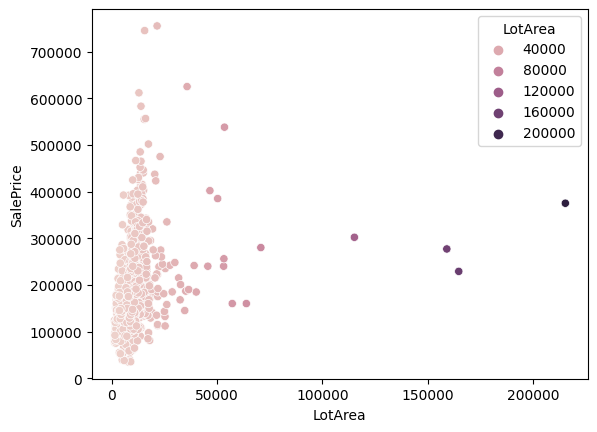

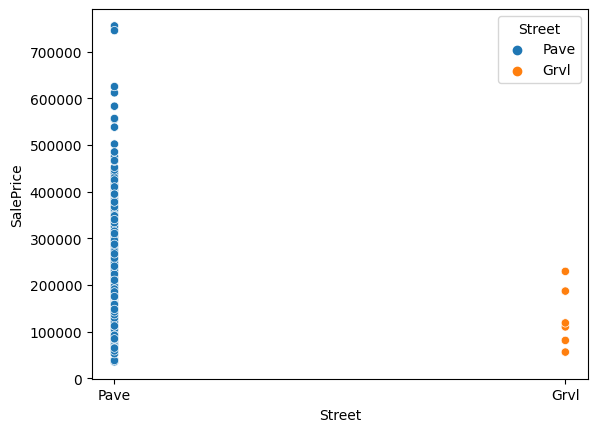

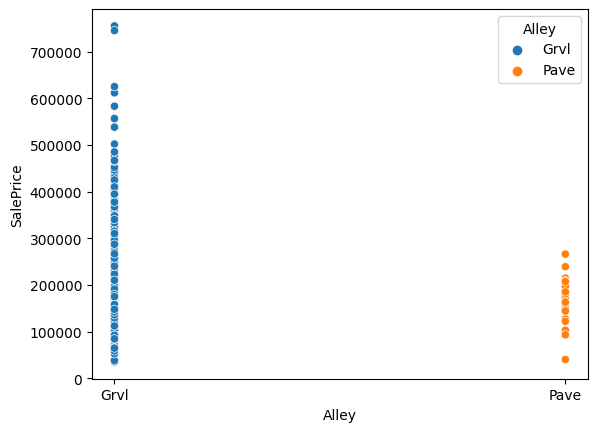

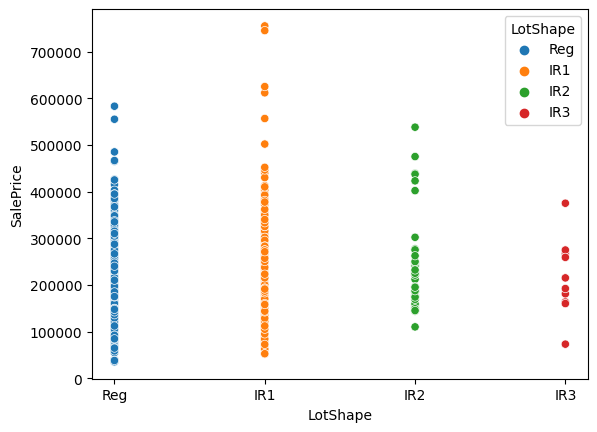

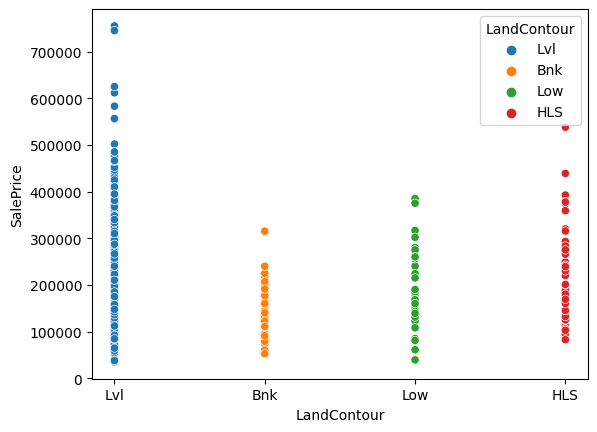

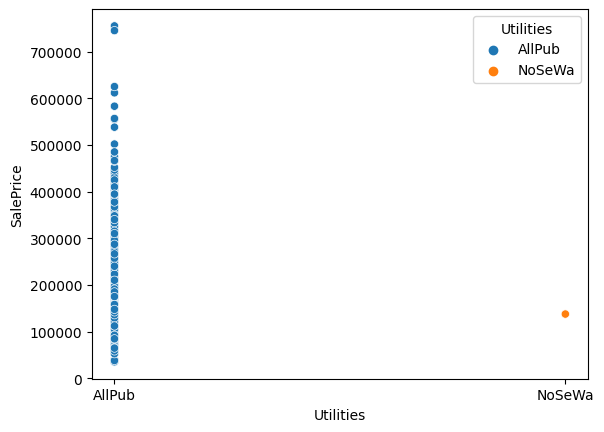

In [8]:
for col_name in imp_x_features:
    sns.scatterplot(train_data, x=col_name, y='SalePrice', hue=col_name)
    plt.show()

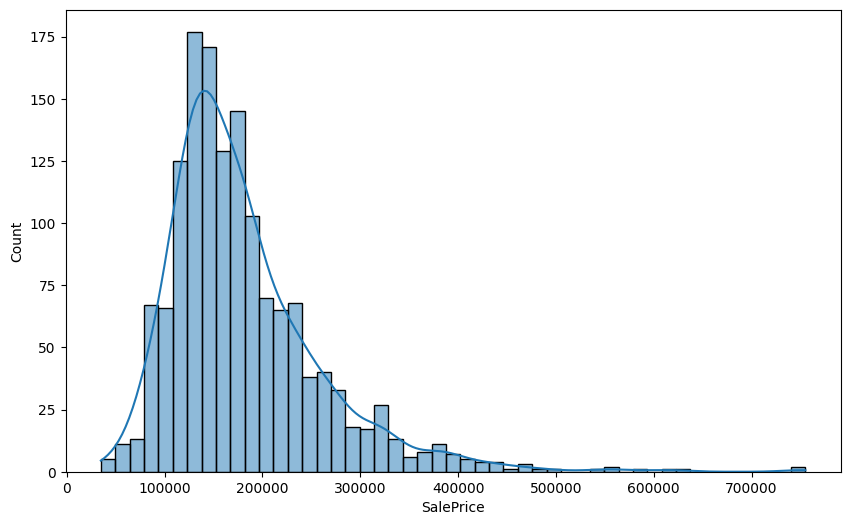

In [9]:
# Sale price distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.show()

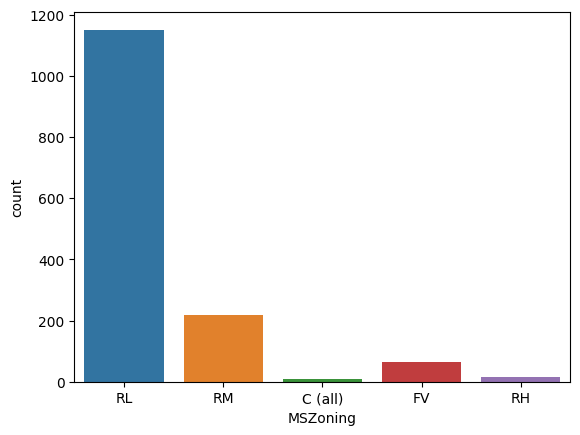

In [10]:
sns.countplot(data=train_data, x='MSZoning')
plt.show()

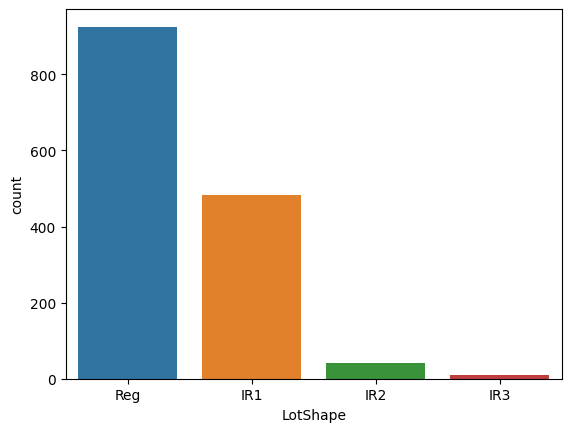

In [11]:
sns.countplot(data=train_data, x='LotShape')
plt.show()

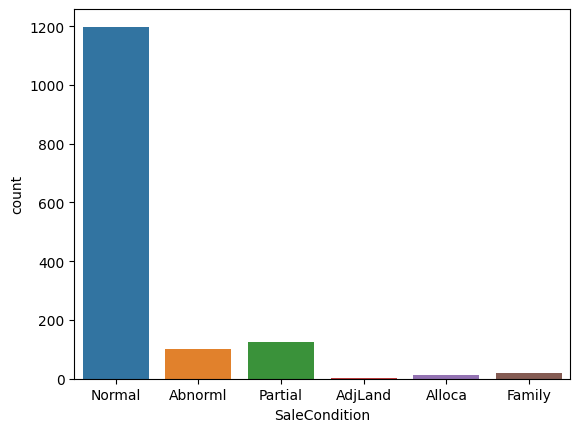

In [12]:
sns.countplot(data=train_data, x='SaleCondition')
plt.show()

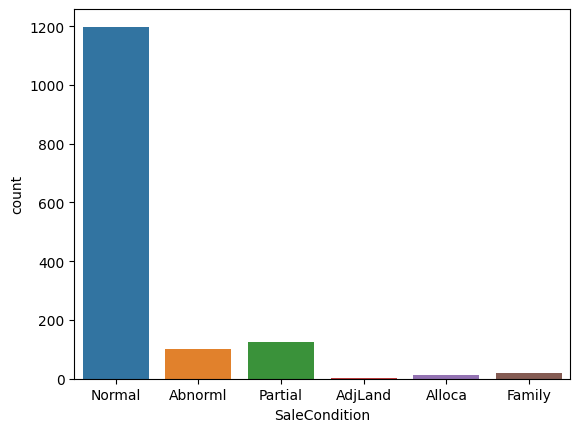

In [13]:
sns.countplot(data=train_data, x='SaleCondition')
plt.show()

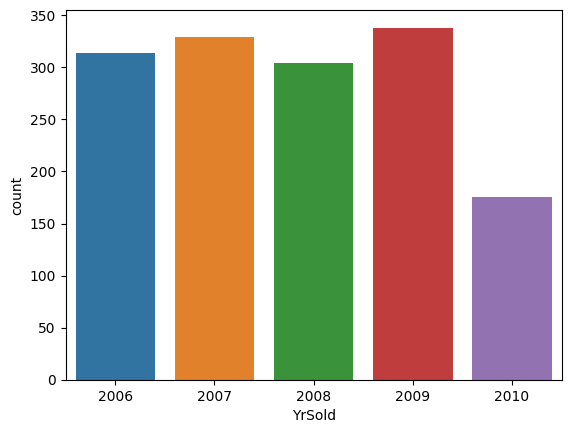

In [14]:
sns.countplot(data=train_data, x='YrSold')
plt.show()

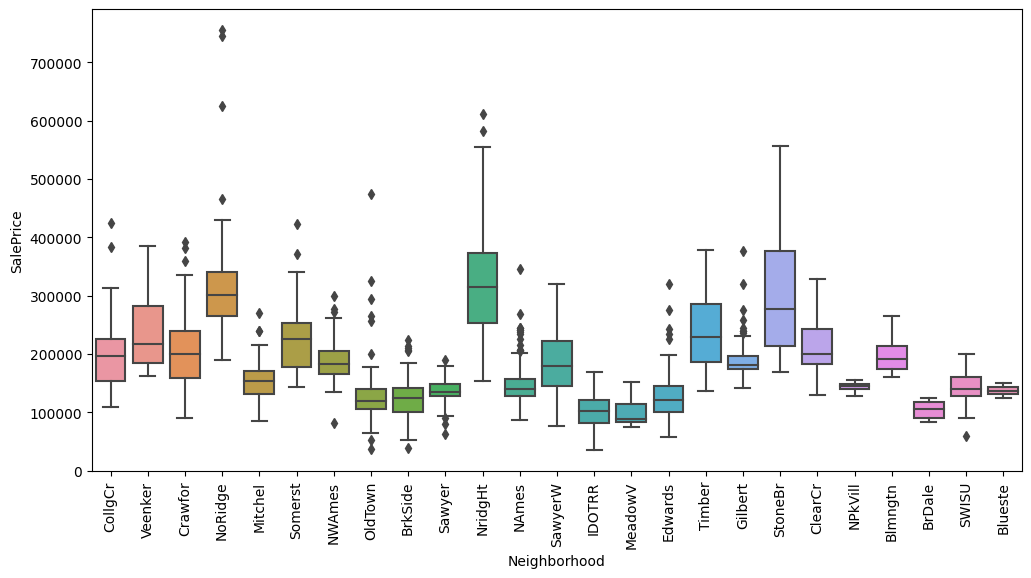

In [15]:
# Neighborhood vs. Sale Price
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.xticks(rotation=90)
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

models = [
    ('LiR', LinearRegression()),
    ('LoR', LogisticRegression()),
    ('KNN', KNeighborsRegressor(n_neighbors=8)),
    ('LSV', LinearSVR()),
    ('SVR', SVR()),
    ('RFR', RandomForestRegressor()),
]

In [17]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
data.dropna(subset=['SalePrice'], inplace=True)
data.fillna(0, inplace=True)

# test df cleanup
test_data.fillna(0, inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
# Features selection
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = data[features]
y = data['SalePrice']
X_test= test_data[features]

In [19]:
# Feature scaling
scacler = StandardScaler()
x_scaled = scacler.fit_transform(X)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

LiR
Mean Squared Error (MSE): 1576962754.88
Mean Absolute Error (MAE): 25319.86
R-squared (R2): 0.79


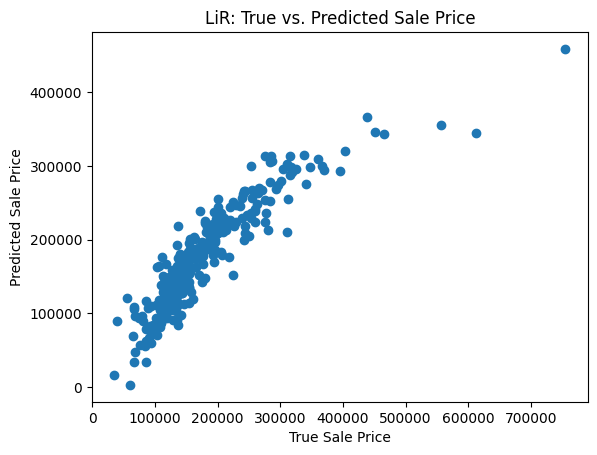

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


LoR
Mean Squared Error (MSE): 2277263538.73
Mean Absolute Error (MAE): 30161.18
R-squared (R2): 0.70


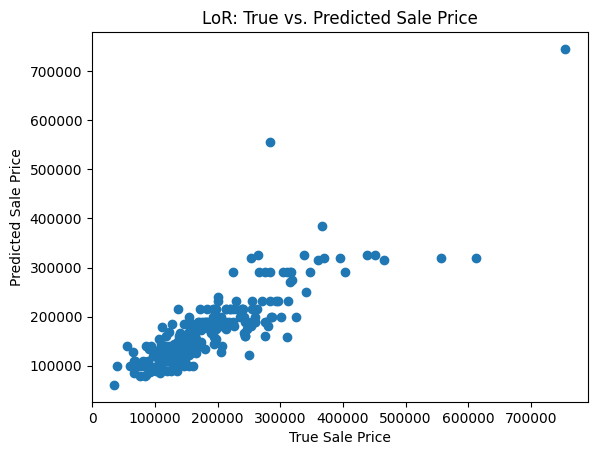

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


KNN
Mean Squared Error (MSE): 1207599968.56
Mean Absolute Error (MAE): 21067.42
R-squared (R2): 0.84


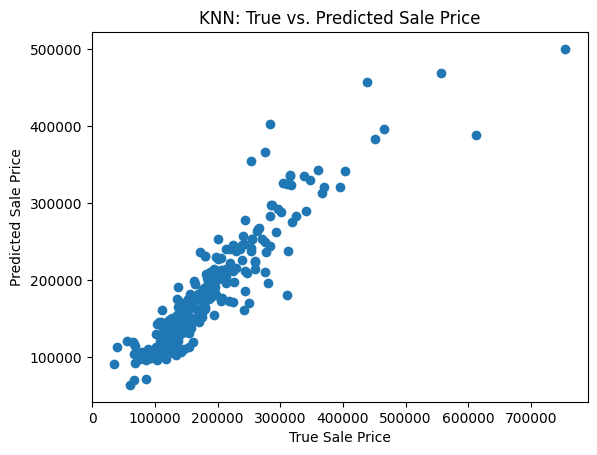

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


LSV
Mean Squared Error (MSE): 39228710101.04
Mean Absolute Error (MAE): 177680.35
R-squared (R2): -4.11


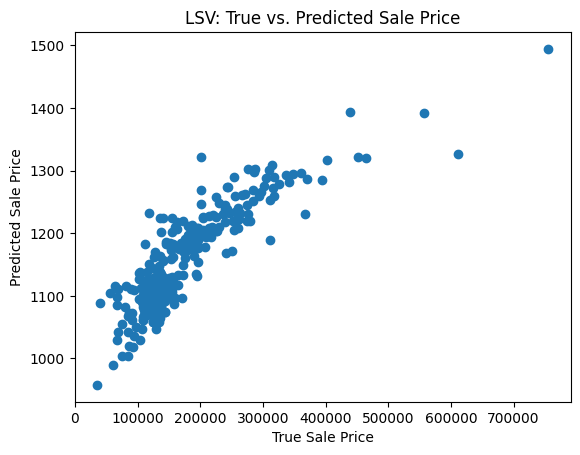

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(


SVR
Mean Squared Error (MSE): 7845511123.89
Mean Absolute Error (MAE): 59432.41
R-squared (R2): -0.02


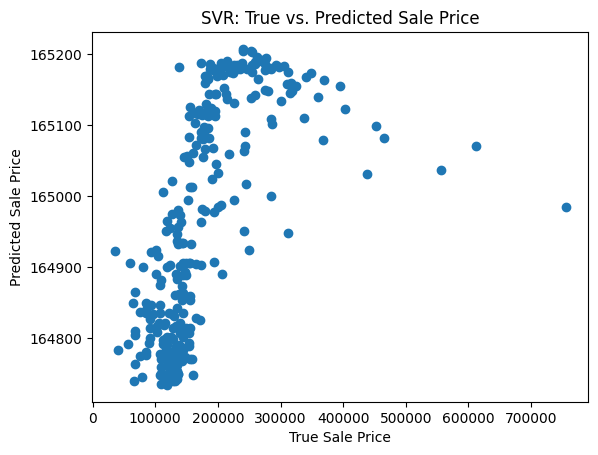

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


RFR
Mean Squared Error (MSE): 872958377.06
Mean Absolute Error (MAE): 19336.03
R-squared (R2): 0.89


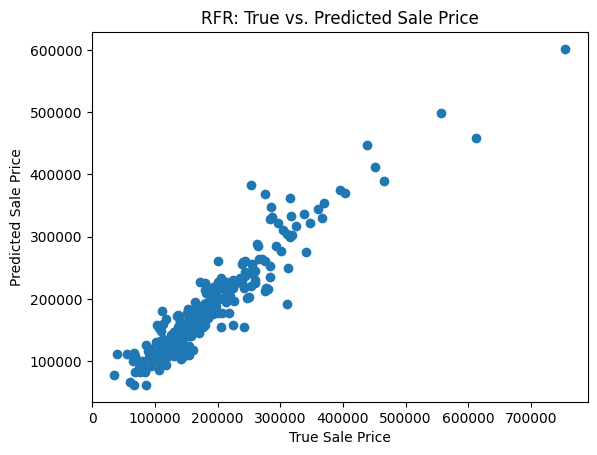

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [21]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(name)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Sale Price")
    plt.ylabel("Predicted Sale Price")
    plt.title(f"{name}: True vs. Predicted Sale Price")
    plt.show()
    
    output = model.predict(X_test)
    arr = test_data.loc[:,'Id']
    output_df = pd.DataFrame({'Id':arr, 'SalePrice': output.flatten()})
    output_df.to_csv(f'/kaggle/working/{name}-output.csv', encoding='utf-8', index=False)